In [29]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

In [30]:
plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [31]:
from torchvision.io import read_image

img_path = os.path.join("Data/images/img_00001.png")
mask_path = os.path.join("Data/annotations/img_00001.png")
img = read_image(img_path)
mask = read_image(mask_path)

In [32]:
print(mask.size())
print(img.size())
print(mask)

torch.Size([1, 1144, 1600])
torch.Size([3, 1144, 1600])
tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]], dtype=torch.uint8)


In [33]:
# We get the unique colors, as these would be the object ids.
obj_ids = torch.unique(mask)

# first id is the background, so remove it.
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set of boolean masks.
# Note that this snippet would work as well if the masks were float values instead of ints.
masks = mask == obj_ids[:, None, None]

In [34]:
print(masks.size())
print(masks)

torch.Size([1, 1144, 1600])
tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])


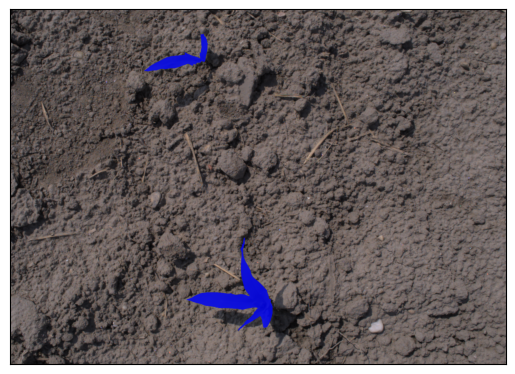

In [35]:
from torchvision.utils import draw_segmentation_masks

drawn_masks = []
for mask in masks:
    drawn_masks.append(draw_segmentation_masks(img, mask, alpha=0.8, colors="blue"))

show(drawn_masks)

In [36]:
from torchvision.ops import masks_to_boxes

boxes = masks_to_boxes(masks)
print(boxes.size())
print(boxes)

torch.Size([1, 4])
tensor([[ 432.,   80.,  846., 1036.]])


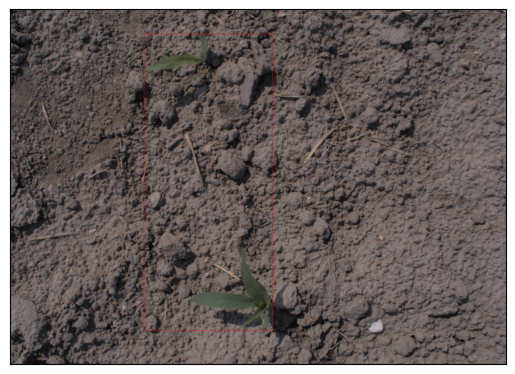

In [37]:
from torchvision.utils import draw_bounding_boxes

drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
show(drawn_boxes)